In [1]:
import numpy as np # type: ignore
import pandas as pd # type: ignore

In [2]:
# Timestamp -> particular moment in time 
pd.Timestamp('19 Dec 2024 10:29')
pd.Timestamp('19 Dec 2024 10:29').year
pd.Timestamp('19 Dec 2024 10:29').month
pd.Timestamp('19 Dec 2024 10:29').hour
pd.Timestamp('19 Dec 2024 10:29').day
pd.Timestamp('19 Dec 2024 10:29').minute

# DatetimeIndex -> collection of timestamp
d = pd.DatetimeIndex([pd.Timestamp('19 Dec 2024 10:29'), pd.Timestamp('05 Dec 2023 12:03'), pd.Timestamp('16 Sep 2025 01:39')])
d[0]

# date_range -> generate date/timestamp in given range
pd.date_range(start='2023-12-21', end='2023-12-30', freq='D')

# to_datetime -> any format to datetime format
s = ['2023/1/6', '2024/2/14']
dates = pd.to_datetime(s)
pd.Series(dates).dt.month_name()
pd.Series(dates).dt.year
pd.Series(dates).dt.day_name()

0       Friday
1    Wednesday
dtype: object

In [3]:
# Timedelta object -> difference of two timestamp   

t1 = pd.Timestamp('19 Dec 2024 10:53:00')
t2 = pd.Timestamp('2 Feb 2025 1:20:00')
t2 - t1

# 2nd Way
pd.Timedelta(days = 2, hours = 10, minutes = 34)

# arithmetic operation
pd.Timestamp('19 Dec 2024') + pd.Timedelta(days = 2, hours = 10, minutes = 34)

Timestamp('2024-12-21 10:34:00')

In [4]:
pd.date_range(start='2024-12-13', end = '2024-12-23', freq='D') + pd.Timedelta(days = 2, hours = 10, minutes = 34)
pd.date_range(start='2024-12-13', end = '2024-12-23', freq='D') - pd.Timedelta(days = 2, hours = 10, minutes = 34)

DatetimeIndex(['2024-12-10 13:26:00', '2024-12-11 13:26:00',
               '2024-12-12 13:26:00', '2024-12-13 13:26:00',
               '2024-12-14 13:26:00', '2024-12-15 13:26:00',
               '2024-12-16 13:26:00', '2024-12-17 13:26:00',
               '2024-12-18 13:26:00', '2024-12-19 13:26:00',
               '2024-12-20 13:26:00'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.read_csv("./deliveries.csv")
df.head()

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92
3,7/21/92,11/20/97
4,9/2/93,6/10/98


In [6]:
df.shape
df['order_date'] = pd.to_datetime(df['order_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_18612\2715695563.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date'] = pd.to_datetime(df['order_date'])
C:\Users\Asus\AppData\Local\Temp\ipykernel_18612\2715695563.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['delivery_date'] = pd.to_datetime(df['delivery_date'])


In [7]:
# df.info()
df['delivery_time_period'] = df['delivery_date'] - df['order_date']
df['delivery_time_period'].mean()

Timedelta('1217 days 22:53:53.532934128')

In [8]:
# -------------------------- How to deal with time series data 

google = pd.read_csv("./google.csv")
google.head() 
google['Date'] = pd.to_datetime(google['Date'])

In [9]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4471 non-null   datetime64[ns]
 1   Open       4471 non-null   float64       
 2   High       4471 non-null   float64       
 3   Low        4471 non-null   float64       
 4   Close      4471 non-null   float64       
 5   Adj Close  4471 non-null   float64       
 6   Volume     4471 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 244.6 KB


In [10]:
google = google.set_index('Date')

In [11]:
google

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100


In [12]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [13]:
# fetch a specific date 
google.loc['2021-12-31']

Open           2910.879883
High           2927.300049
Low            2893.550049
Close          2893.590088
Adj Close      2893.590088
Volume       864900.000000
Name: 2021-12-31 00:00:00, dtype: float64

In [14]:
# partial indexing -> using only year and month

google.loc['2020-12']
google.loc['2020']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400
2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300
2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700
2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000
...,...,...,...,...,...,...
2020-12-24,1735.000000,1746.000000,1729.109985,1738.849976,1738.849976,346800
2020-12-28,1751.635010,1790.728027,1746.334961,1776.089966,1776.089966,1393000
2020-12-29,1787.790039,1792.439941,1756.089966,1758.719971,1758.719971,1299400


In [15]:
google['month_name'] = google.index.month_name()
google['day_name'] = google.index.day_name()
google['quarter'] = google.index.quarter

In [16]:
google

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday,3
...,...,...,...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100,May,Monday,2
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800,May,Tuesday,2
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100,May,Wednesday,2


In [17]:
# slicing 

google.loc['2020-12-15': '2021-01-01']
google.loc['2020-12-15': '2021-01-01': 2]# give me alternate day

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2020-12-15,1764.420044,1771.420044,1749.949951,1767.770020,1767.770020,1482300,December,Tuesday,4
2020-12-17,1768.510010,1771.784058,1738.660034,1747.900024,1747.900024,1624700,December,Thursday,4
2020-12-21,1713.510010,1740.849976,1699.000000,1739.369995,1739.369995,1828400,December,Monday,4
2020-12-23,1728.109985,1747.989990,1725.040039,1732.380005,1732.380005,1033800,December,Wednesday,4
2020-12-28,1751.635010,1790.728027,1746.334961,1776.089966,1776.089966,1393000,December,Monday,4
2020-12-30,1762.010010,1765.094971,1725.599976,1739.520020,1739.520020,1306100,December,Wednesday,4


In [18]:
# find particular date in each year

google.head(10)
pd.date_range(start = '2005-01-01', end = '2021-12-01', freq=pd.DateOffset(years=1))

DatetimeIndex(['2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
               '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01',
               '2021-01-01'],
              dtype='datetime64[ns]', freq='<DateOffset: years=1>')

In [19]:
google[google.index.isin(pd.date_range(start = '2005-1-10', end = '2022-1-6', freq=pd.DateOffset(years=1)))]

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2005-01-10,96.886841,98.680122,95.556831,97.165802,97.165802,15135721,January,Monday,1
2006-01-10,231.342865,234.246979,230.157318,234.002899,234.002899,18262396,January,Tuesday,1
2007-01-10,241.310516,245.853485,240.119965,243.816116,243.816116,11981743,January,Wednesday,1
2008-01-10,321.300690,327.372925,318.859833,322.157471,322.157471,12715884,January,Thursday,1
2011-01-10,306.252106,306.545990,303.143738,305.958191,305.958191,3170238,January,Monday,1
2012-01-10,313.699188,315.716614,307.303162,310.406525,310.406525,8824152,January,Tuesday,1
2013-01-10,370.028046,371.108978,365.380463,369.355560,369.355560,3685161,January,Thursday,1
2014-01-10,567.413208,567.413208,559.029602,562.979797,562.979797,4303069,January,Friday,1
2017-01-10,807.859985,809.130005,803.510010,804.789978,804.789978,1176800,January,Tuesday,1


<Axes: xlabel='Date'>

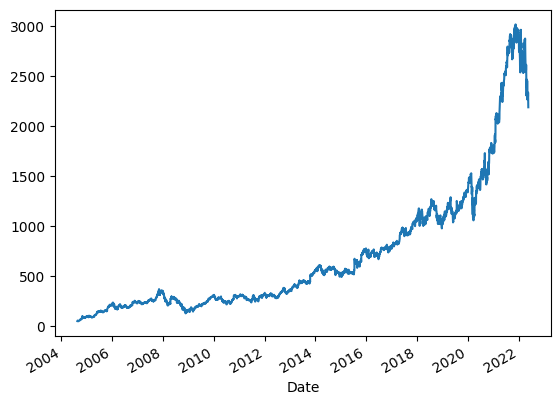

In [20]:
# visualization a single col 

google['Close'].plot()

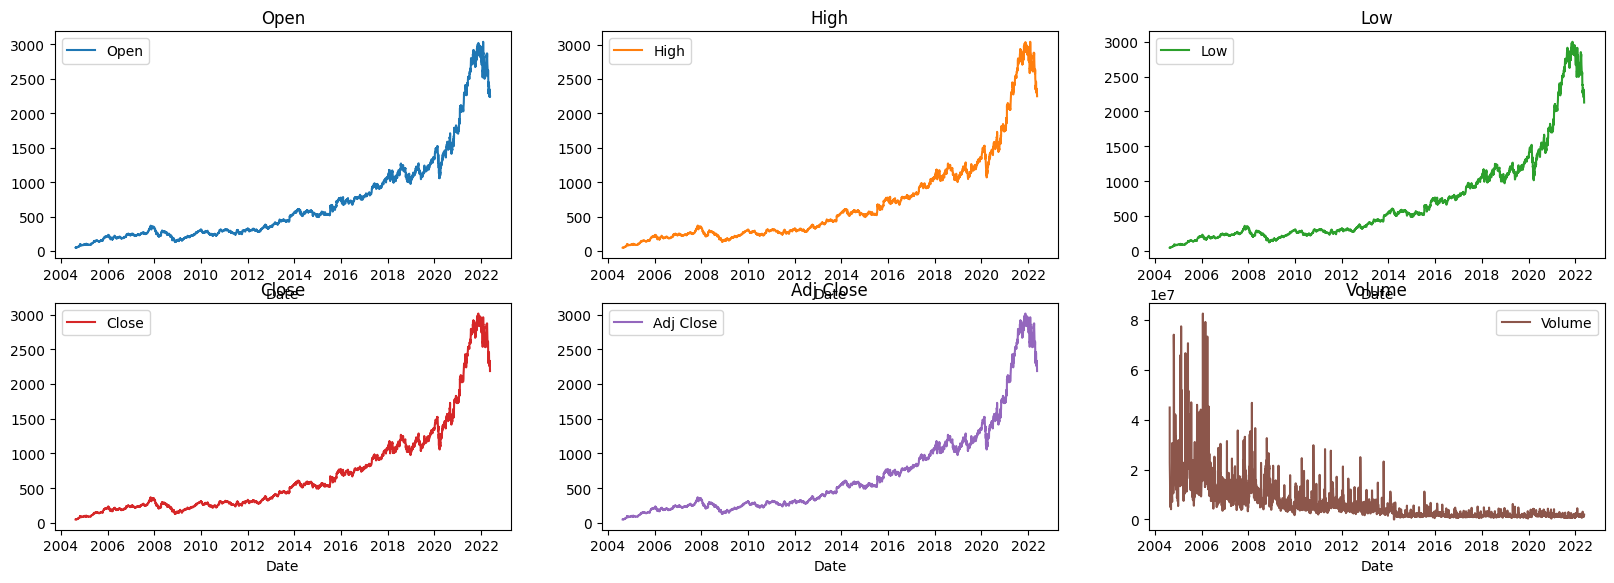

In [ ]:
# viz all cols together
subset_google = google[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
ax = subset_google.plot(subplots=True, layout=(3, 3), sharex=False, sharey=False, fontsize=10, figsize=(20,10), title=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

<Axes: xlabel='Date'>

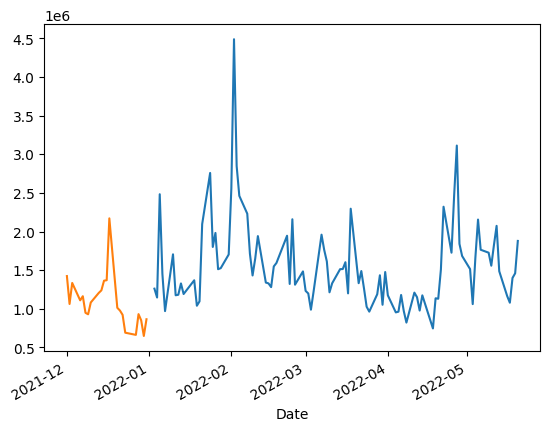

In [22]:
# plot for particular year
google.loc['2022']['Volume'].plot()
google.loc['2021-12']['Volume'].plot()

In [23]:
# frequency 

# google -> data is business day data
google.index
google.asfreq('D') # add other day as there is no data hence it fill up as None
google = google.asfreq("B")

In [24]:
google.asfreq('QE')
google.asfreq('YE') # last date of each year 
google.asfreq('ME') # last month of each year
google.asfreq("h") 
google.asfreq("6h", method = 'ffill') # forward fill
google.asfreq("6h", method = 'bfill') # backward fill


,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2004-08-19 00:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 06:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
2004-08-19 12:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
2004-08-19 18:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
2004-08-20 00:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
...,...,...,...,...,...,...,...,...,...
2022-05-19 00:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday,2.0
2022-05-19 06:00:00,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100.0,May,Friday,2.0
2022-05-19 12:00:00,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100.0,May,Friday,2.0


<Axes: xlabel='Date'>

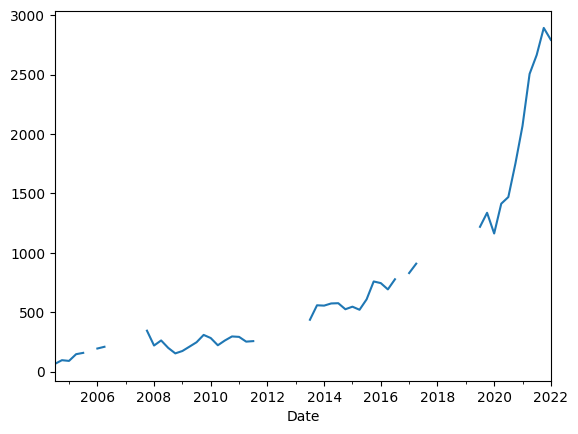

In [25]:
google['Close'].asfreq('QE').plot()

<Axes: xlabel='month_name'>

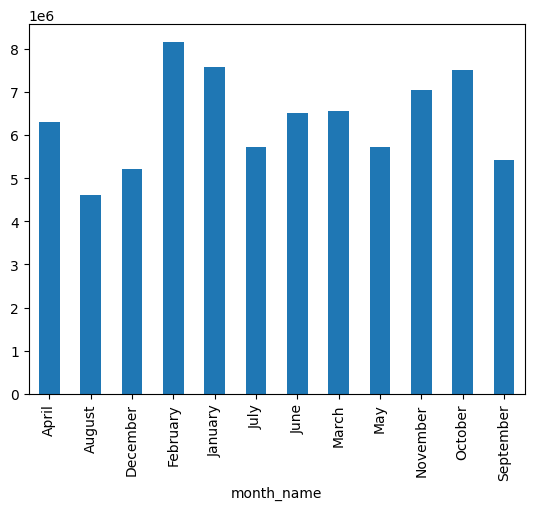

In [26]:
# monthly trend

google.groupby('month_name')['Volume'].mean().plot(kind = 'bar')

<Axes: xlabel='day_name'>

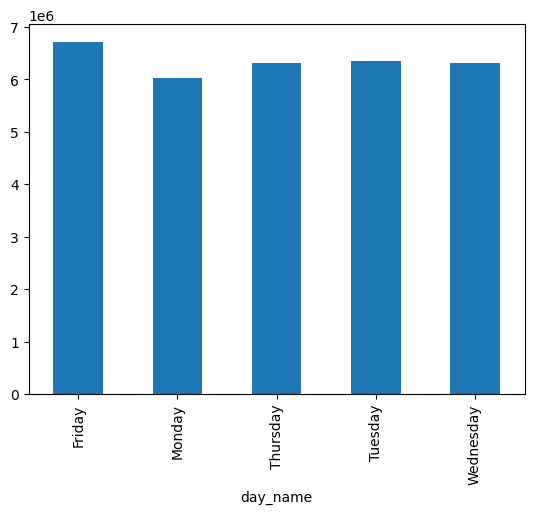

In [27]:
# yearly trend

google.groupby('day_name')['Volume'].mean().plot(kind = 'bar')

<Axes: xlabel='quarter'>

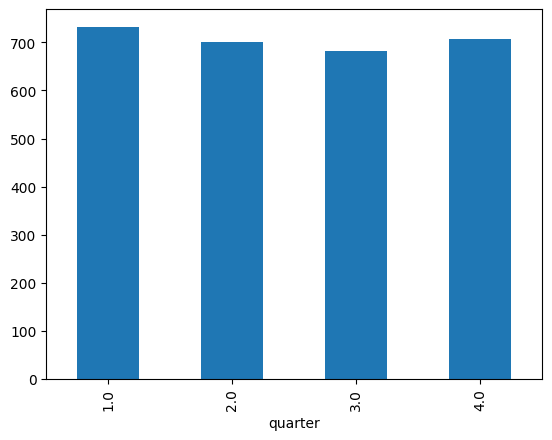

In [28]:
google.groupby('quarter')['Close'].mean().plot(kind = 'bar')

In [29]:
google

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897.0,August,Monday,3.0
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808.0,August,Tuesday,3.0
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276.0,August,Wednesday,3.0
...,...,...,...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100.0,May,Monday,2.0
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800.0,May,Tuesday,2.0
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100.0,May,Wednesday,2.0


C:\Users\Asus\AppData\Local\Temp\ipykernel_18612\621154351.py:13: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  google['Volume'].resample('ME').mean().plot()


<Axes: xlabel='Date'>

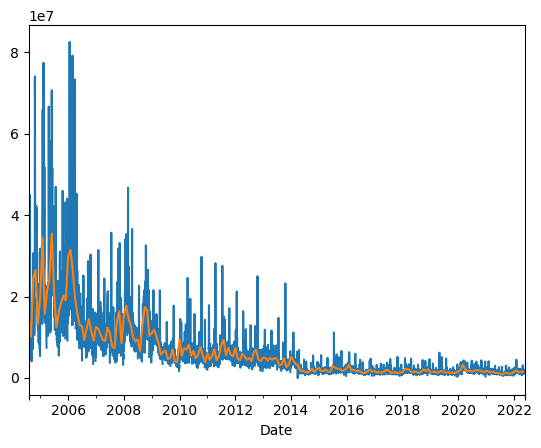

In [30]:
# --------------------- Resampling (change frequency of time series data)
# google.asfreq('B') # -> google data frequency is business day

''' 
Up-Sampling -> increase (minute to second)
Down-Sampling -> decrease (days to months)
'''

# down-sampling
google['Volume'].plot()
google['Volume'].resample('W')
google['Volume'].resample('ME').mean()
google['Volume'].resample('ME').mean().plot()

<Axes: xlabel='Date'>

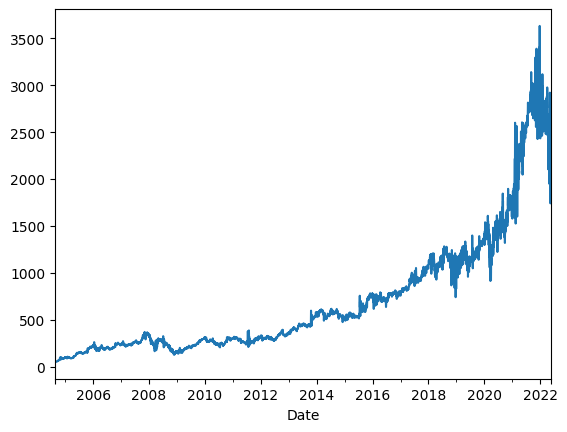

In [31]:
google['Close'].resample('h').interpolate(method='spline',order=2).plot()

<Axes: xlabel='Date'>

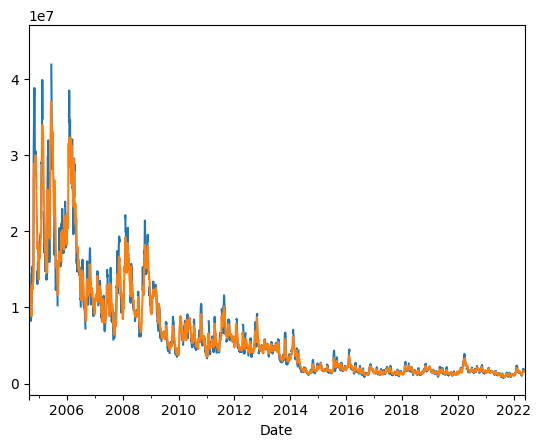

In [32]:
# ----------------------- Rolling Window 

# google['Close'].plot()
google['Volume'].rolling(10).mean().plot()
google['Volume'].ewm(10).mean().plot() #

In [33]:
# ----------------------  Shifting (Shift entire series up or down)

google['Volume']
google['Volume'].shift(2) # forward
google['Volume'].shift(-2) # backward

Date
2004-08-19    18342897.0
2004-08-20    15319808.0
2004-08-23     9232276.0
2004-08-24     7128620.0
2004-08-25     6241307.0
                 ...    
2022-05-16     1399100.0
2022-05-17     1459600.0
2022-05-18     1878100.0
2022-05-19           NaN
2022-05-20           NaN
Freq: B, Name: Volume, Length: 4632, dtype: float64

In [34]:
df = pd.read_csv("./login.csv", header=None)
df1 = df[[1, 2]]
df1.head()
df1.rename(columns = {
    1: 'user_id',
    2: 'login_time'
}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_18612\837200008.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns = {


In [35]:
df1['user_id'].value_counts()
user_df = df1[df1['user_id'] == 413]

In [36]:
user_df.head()

,user_id,login_time
11,413,2017-01-09 12:29:25
12,413,2017-01-09 12:40:39
14,413,2017-01-09 14:08:04
33,413,2017-01-10 14:36:23
35,413,2017-01-10 15:22:45


In [37]:
user_df['login_time'] = pd.to_datetime(user_df['login_time'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_18612\3275549453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['login_time'] = pd.to_datetime(user_df['login_time'])


In [38]:
user_df['shifted'] = user_df['login_time'].shift(1)

C:\Users\Asus\AppData\Local\Temp\ipykernel_18612\3509294578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['shifted'] = user_df['login_time'].shift(1)


In [39]:
user_df['login_time'] - user_df['shifted']
(user_df['login_time'] - user_df['shifted']).mean()

Timedelta('1 days 15:05:13.384615384')